# Kmeans

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
import os

In [3]:
from sklearn.cluster import KMeans

# Множества

In [4]:
Mtest1 = np.array([[0, 0]])
i = 0
while (i < 1000):
    X1 = 3 - 6 * np.random.rand(1,1)
    Y1 = 3 - 6 * np.random.rand(1,1)
    M1 = np.concatenate([X1,Y1], axis=1)
    d = X1[:] ** 2 + Y1[:] ** 2
    if (d < 1 or 3 < d < 6):
        Mtest1 = np.concatenate([Mtest1, M1], axis=0)
        i+=1

<AxesSubplot:>

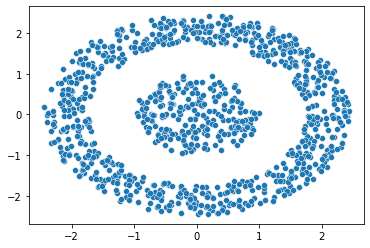

In [5]:
sns.scatterplot(data=Mtest1, x=Mtest1[:,0], y=Mtest1[:,1])

In [6]:
Mtest2 = np.array([[0, 1]])
i = 0
while (i < 1000):
    X1 = 10 * np.random.rand(1,1)
    Y1 = 5 * np.random.rand(1,1)
    M1 = np.concatenate([X1,Y1], axis=1)
    f1 = 1 + np.sin(X1[:])
    f2 = 2 + np.sin(X1[:])
    if (f1 < Y1 < f2):
        Mtest2 = np.concatenate([Mtest2, M1], axis=0)
        i+=1
    f1 = 3 + np.sin(X1[:])
    f2 = 4 + np.sin(X1[:])
    if (f1 < Y1 < f2):
        Mtest2 = np.concatenate([Mtest2, M1], axis=0)
        i+=1

<AxesSubplot:>

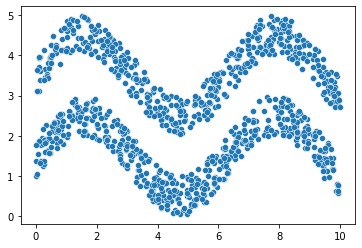

In [7]:
sns.scatterplot(data=Mtest2, x=Mtest2[:,0], y=Mtest2[:,1])

In [8]:
Mtest3 = np.array([[-5, 2]])
i = 0
while (i < 1000):
    X1 = 6 - 12 * np.random.rand(1,1)
    Y1 = 6 - 12 * np.random.rand(1,1)
    M1 = np.concatenate([X1,Y1], axis=1)
    d1 = ((X1[:] + 6) / 4) ** 2 + (Y1[:] / 2) ** 2
    d2 = ((X1[:] + 6) / 6) ** 2 + (Y1[:] / 4) ** 2
    if (d1 > 1 and d2 < 1):
        Mtest3 = np.concatenate([Mtest3, M1], axis=0)
        i+=1
    X1 = 6 - 12 * np.random.rand(1,1)
    Y1 = 6 - 12 * np.random.rand(1,1)
    M1 = np.concatenate([X1,Y1], axis=1)
    d1 = ((X1[:] - 6) / 4) ** 2 + (Y1[:] / 2) ** 2
    d2 = ((X1[:] - 6) / 6) ** 2 + (Y1[:] / 4) ** 2
    if (d1 > 1 and d2 < 1):
        Mtest3 = np.concatenate([Mtest3, M1], axis=0)
        i+=1

<AxesSubplot:>

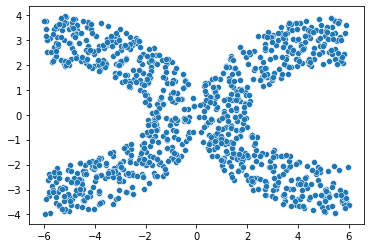

In [9]:
sns.scatterplot(data=Mtest3, x=Mtest3[:,0], y=Mtest3[:,1])

## Большое множество
100000

In [10]:
X1 = 1000 * np.random.rand(int(1e5),1)
Y1 = 1000 * np.random.rand(int(1e5),1)
Mbig = np.concatenate([X1,Y1], axis=1)

<AxesSubplot:>

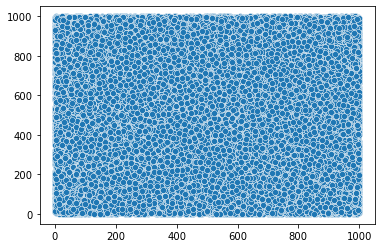

In [11]:
sns.scatterplot(data=Mbig, x=Mbig[:,0], y=Mbig[:,1])

## Сохраняем множества

In [12]:
f_name = "../test/kmeans_test_" 
f_ext = ".csv"

In [13]:
M = [Mtest1, Mtest2, Mtest3, Mbig]

i = 1
for m in M:
    pd.DataFrame(m).to_csv(f_name + str(i) + f_ext, index=False)
    i += 1

# Проверка kmeans Python

In [14]:
os.listdir("../test")

for file in os.listdir("../test"):
    if file.endswith(".csv"):
        print(os.path.join("../test", file))

../test/kmeans_test_4_ans.csv
../test/kmeans_test_3_ans.csv
../test/kmeans_test_2.csv
../test/kmeans_test_3.csv
../test/kmeans_test_1.csv
../test/kmeans_test_4.csv
../test/kmeans_test_2_ans.csv
../test/kmeans_test_1_ans.csv


CPU times: user 290 ms, sys: 42.1 ms, total: 332 ms
Wall time: 141 ms


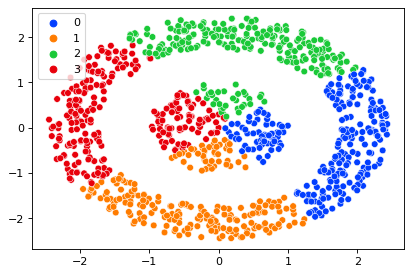

CPU times: user 346 ms, sys: 38 ms, total: 384 ms
Wall time: 145 ms


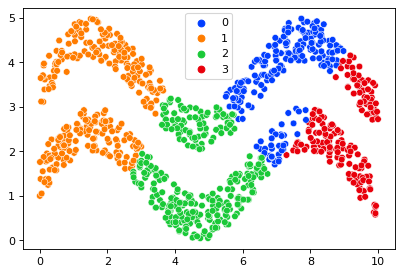

CPU times: user 233 ms, sys: 23.8 ms, total: 257 ms
Wall time: 85 ms


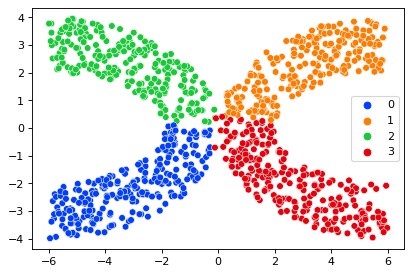

CPU times: user 2.87 s, sys: 243 ms, total: 3.12 s
Wall time: 1.23 s


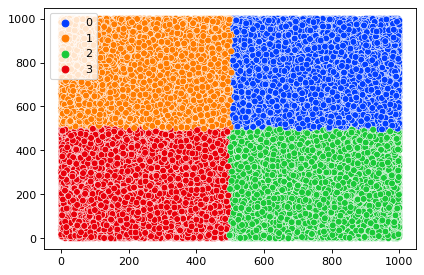

In [15]:
i = 1
for m in M:
    kmeans = KMeans(n_clusters=4, random_state=0)
    %time kmeans.fit(m)
    
    plt.figure(dpi=80)
    testplot = sns.scatterplot(data=m, x=m[:,0], y=m[:,1], hue = kmeans.labels_, palette="bright")
    plt.savefig('../test/scikit_kmeans_' + str(i) + '.png')
    plt.show()
    
    i += 1

# Проверка kmeans Haskell

In [16]:
! echo "main" | stack ghci ../test/KMeans.hs

Using configuration for mllib:test:mllib-test to load /Users/vsha96/git_repos/private/haskell/mllib/test/KMeans.hs
Using main module: 1. Package `mllib' component mllib:test:mllib-test with main-is file: /Users/vsha96/git_repos/private/haskell/mllib/test/Spec.hs
Progress 0          mllib> configure (lib + test)
Progress 0          Configuring mllib-0.1.0.0...
Progress 0          mllib> initial-build-steps (lib + test)
Progress 0          mllib> Test running disabled by --no-run-tests flag.
Progress 0          Completed 2 action(s).
The following GHC options are incompatible with GHCi and have not been passed to it: -threaded
Configuring GHCi with the following packages: mllib
GHCi, version 8.10.7: https://www.haskell.org/ghc/  :? for help
[1 of 1] Compiling KMeans           ( /Users/vsha96/git_repos/private/haskell/mllib/test/KMeans.hs, interpreted )
Ok, one module loaded.
Loaded GHCi configuration from /private/var/folders/pf/s_blgvp12rvg2fshg70fzrf80000gn/T/haskell-stack-ghci/6714406

In [17]:
os.listdir("../test")

files = []

for file in os.listdir("../test"):
    if "_ans" in file and file.endswith(".csv"):
        files.append(os.path.join("../test", file))

In [18]:
files

['../test/kmeans_test_4_ans.csv',
 '../test/kmeans_test_3_ans.csv',
 '../test/kmeans_test_2_ans.csv',
 '../test/kmeans_test_1_ans.csv']

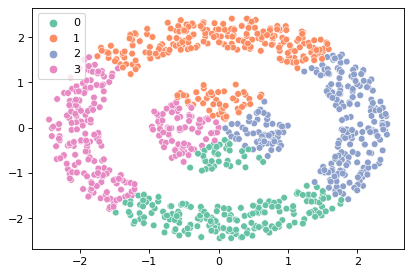

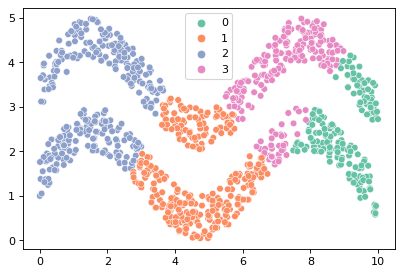

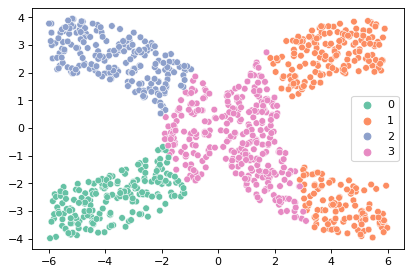

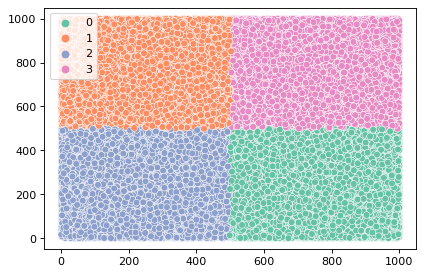

In [19]:
i = 1
fileName = '../test/kmeans_test_'
fileExt = '_ans.csv'
for m in M:
    df = pd.read_csv(fileName + str(i) + fileExt)
    ans = []
    for val in df.values.tolist():
        ans.append(val[0])
    
    plt.figure(dpi=80)
    testplot = sns.scatterplot(data=m, x=m[:,0], y=m[:,1], hue=ans, palette="Set2")
    plt.savefig('../test/haskell_kmeans_' + str(i) + '.png')
    plt.show()
    
    i += 1